<a href="https://colab.research.google.com/github/nhanguyenai/HomeWork-Predict/blob/main/Palm_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Các lớp (tên thư mục): ['not_palm', 'palm']
Found 1594 files belonging to 2 classes.
Using 1276 files for training.
Found 1594 files belonging to 2 classes.
Using 318 files for validation.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 546s 4s/step - accuracy: 0.7607 - loss: 0.5338 - val_accuracy: 0.9717 - val_loss: 0.1188
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9686 - loss: 0.0969 - val_accuracy: 0.9906 - val_loss: 0.0515
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9835 - loss: 0.0531 - val_accuracy: 0.9969 - val_loss: 0.0313
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0369 - val_accuracy: 0.9969 - val_loss: 0.0219
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9835 - loss: 0.0361 - val_accuracy: 0.9969 - val_loss: 0.0189
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9970 - loss: 0.0194 - val_accuracy: 0.9969 - val_loss: 0.0173
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9965 - loss: 0.0176 - val_accuracy: 0.9969 - val_loss: 0.0123
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9988 - loss: 0.0106 - val_accuracy: 0.

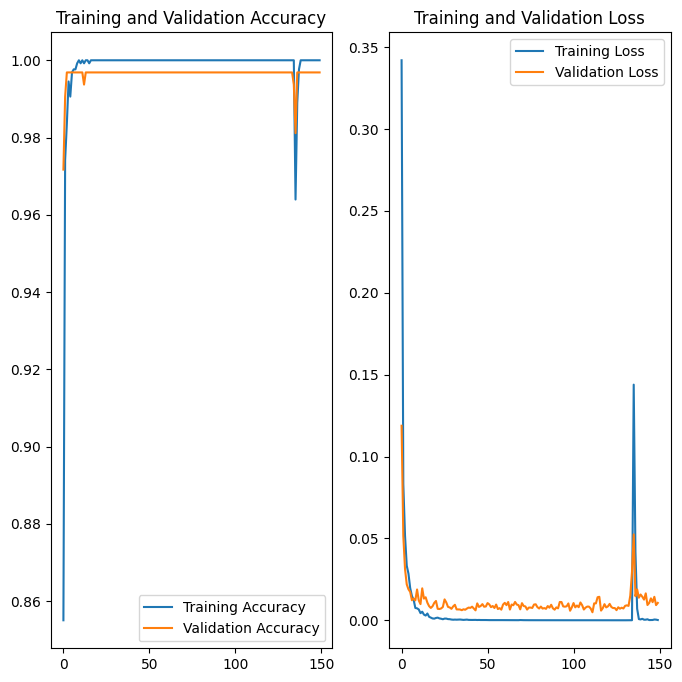

Nhãn thực tế: palm
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Dự đoán: palm (Độ tin cậy: 1.00)
Mô hình đã được lưu vào /content/palm_recognition_model.h5


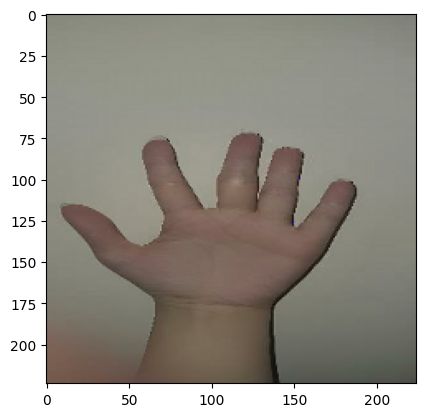

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split

data_dir = '/content/drive/MyDrive/palm_dataset'


if not os.path.exists(data_dir):
    print(f"Lỗi: Thư mục '{data_dir}' không tồn tại. Vui lòng kiểm tra lại đường dẫn.")
    exit()


try:
    class_names = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    if not class_names:
        print(f"Lỗi: Không tìm thấy thư mục con nào trong '{data_dir}'. Đảm bảo dataset được tổ chức thành các thư mục con.")
        exit()
    print("Các lớp (tên thư mục):", class_names)
    num_classes = len(class_names)
except Exception as e:
    print(f"Lỗi khi đọc tên thư mục: {e}")
    exit()

image_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    validation_split=0.2,
    subset='training',
    seed=42,
    interpolation='bicubic'
)

val_ds = image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    validation_split=0.2,
    subset='validation',
    seed=42,
    interpolation='bicubic'
)


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

base_model = tf.keras.applications.MobileNetV2(input_shape=(image_size[0], image_size[1], 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

inputs = tf.keras.Input(shape=(image_size[0], image_size[1], 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


epochs = 150
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

import numpy as np

image_batch, labels_batch = next(iter(val_ds))

first_image = image_batch[0].numpy().astype("uint8")
first_label = labels_batch[0].numpy()

plt.imshow(first_image)
print("Nhãn thực tế:", class_names[np.argmax(first_label)])

prediction = model.predict(np.expand_dims(first_image, axis=0))
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction)
print(f"Dự đoán: {predicted_class} (Độ tin cậy: {confidence:.2f})")

model.save('/content/palm_recognition_model.h5')
print("Mô hình đã được lưu vào /content/palm_recognition_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


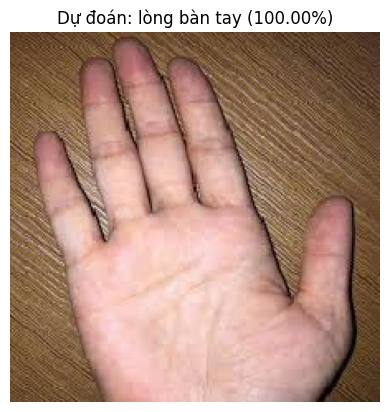

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model_path = '/content/palm_recognition_model.h5'

loaded_model = load_model(model_path)


class_names = ['không phải lòng bàn tay', 'lòng bàn tay']


def load_and_preprocess_image(img_path, target_size=(224, 224)):
    try:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        return img_array
    except Exception as e:
        print(f"Lỗi khi tải và tiền xử lý ảnh: {e}")
        return None


def predict_palm(model, img_array, class_names):
    if img_array is not None:
        prediction = model.predict(img_array)[0][0]
        plt.imshow(image.array_to_img(img_array[0]))
        plt.axis('off')

        if prediction > 0.5:
            predicted_class = class_names[1]
            confidence = prediction
        else:
            predicted_class = class_names[0]
            confidence = 1 - prediction

        plt.title(f"Dự đoán: {predicted_class} ({confidence*100:.2f}%)")
        plt.show()
    else:
        print("Không thể thực hiện dự đoán do lỗi tải ảnh.")

image_to_predict_path = '/content/longbantay.jpg'

processed_image = load_and_preprocess_image(image_to_predict_path)

predict_palm(loaded_model, processed_image, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


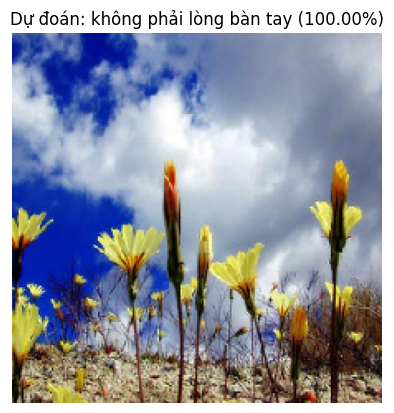

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model_path = '/content/palm_recognition_model.h5'

loaded_model = load_model(model_path)


class_names = ['không phải lòng bàn tay', 'lòng bàn tay']


def load_and_preprocess_image(img_path, target_size=(224, 224)):
    try:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        return img_array
    except Exception as e:
        print(f"Lỗi khi tải và tiền xử lý ảnh: {e}")
        return None


def predict_palm(model, img_array, class_names):
    if img_array is not None:
        prediction = model.predict(img_array)[0][0]
        plt.imshow(image.array_to_img(img_array[0]))
        plt.axis('off')

        if prediction > 0.5:
            predicted_class = class_names[1]
            confidence = prediction
        else:
            predicted_class = class_names[0]
            confidence = 1 - prediction

        plt.title(f"Dự đoán: {predicted_class} ({confidence*100:.2f}%)")
        plt.show()
    else:
        print("Không thể thực hiện dự đoán do lỗi tải ảnh.")

image_to_predict_path = '/content/hoaaa.jpg'

processed_image = load_and_preprocess_image(image_to_predict_path)

predict_palm(loaded_model, processed_image, class_names)